# REST API Basic Samples

## Objective
Processing a single image input with GPT-4V.

## Time

You should expect to spend 5-10 minutes running this sample.

## Before you begin

#### Installation

In [ ]:
%pip install -r ../requirements.txt

### Parameters
You need to set a series of configurations such as GPT-4V_DEPLOYMENT_NAME, OPENAI_API_BASE, OPENAI_API_VERSION.

Add "OPENAI_API_KEY" as variable name and \<Your API Key Value\> as variable value in the environment variables.
 <br>
      
      WINDOWS Users: 
         setx OPENAI_API_KEY "REPLACE_WITH_YOUR_KEY_VALUE_HERE"

      MACOS/LINUX Users: 
         export OPENAI_API_KEY="REPLACE_WITH_YOUR_KEY_VALUE_HERE"

In [ ]:
# Setting up the deployment name
deployment_name: str = "<your GPT-4V deployment name>"
# The base URL for your Azure OpenAI resource. e.g. "https://<your resource name>.openai.azure.com"
openai_api_base: str = "<your resource base URL>"
# Currently OPENAI API have the following versions available: 2022-12-01.
# All versions follow the YYYY-MM-DD date structure.
openai_api_version: str = "<your OpenAI API version>"

should_cleanup: bool = False

## Connect to your project
To start with let us create a config file with your project details. This file can be used in this sample or other samples to connect to your workspace.

In [ ]:
import json
from pathlib import Path

config = {
    "GPT-4V_DEPLOYMENT_NAME": deployment_name,
    "OPENAI_API_BASE": openai_api_base,
    "OPENAI_API_VERSION": openai_api_version,
}

p = Path("../config.json")

with p.open(mode="w") as file:
    file.write(json.dumps(config))

In [4]:
import json
from pathlib import Path

config = {
    "GPT-4V_DEPLOYMENT_NAME": "gpt4v-preview",
    "OPENAI_API_BASE": "https://gtp4v-1218-uswest.openai.azure.com/",
    "OPENAI_API_VERSION": "2023-12-01-preview",
}

p = Path("../config.json")

with p.open(mode="w") as file:
    file.write(json.dumps(config))

In [6]:
import json
from pathlib import Path

In [7]:
from dotenv import load_dotenv

load_dotenv(".env")

""" if ( os.environ['ENVIRONMENT'] == 'development'):
    print("Loading environment variables from .env file")
    load_dotenv(".env") """

' if ( os.environ[\'ENVIRONMENT\'] == \'development\'):\n    print("Loading environment variables from .env file")\n    load_dotenv(".env") '

In [8]:
from azure.identity import DefaultAzureCredential
from azure.storage.blob import BlobServiceClient

# Acquire a credential object
token_credential = DefaultAzureCredential()



In [9]:
# az storage blob list  --account-key wTkQfC9TayFw9eoYGfsgI8nVqADfR6JuV6CzC3QC5f+OiHd4fl7nzHiq3+9vAUVJQ/7N4Q12yZxD+ASt9PAcYg== --account-name staistudio11046512515952 --container-name mycontainer


blob_service_client = BlobServiceClient(
        account_url="https://staistudio11046512515952.blob.core.windows.net",
        credential=token_credential)

bloblist = blob_service_client.get_container_client("mycontainer").list_blob_names()
print(bloblist)

<iterator object azure.core.paging.ItemPaged at 0x7f9e1f746ef0>


In [10]:
import os

# changeme birth year 
os.environ["OPENAI_API_KEY"] = "8eecbeae996e499b8d3b49047b32ed73"
print(os.getenv("OPENAI_API_KEY"))

8eecbeae996e499b8d3b49047b32ed72


## Run this Example

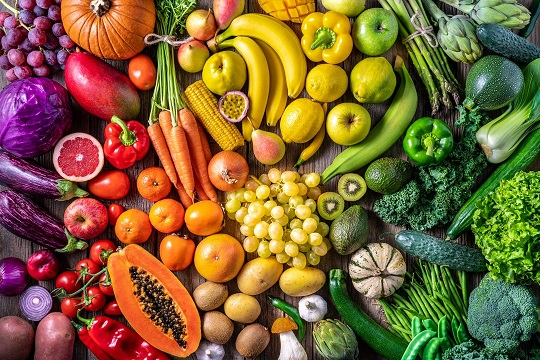

1. Fresh produce
2. Variety of fruits
3. Assorted vegetables
4. Colorful food
5. Healthy eating
6. Organic groceries
7. Vegan options
8. Nutritious diet
9. Raw ingredients
10. Vegetarian lifestyle
11. Farm produce
12. Seasonal fruits and vegetables
13. Market goods
14. Whole foods
15. Dietary fiber sources


In [11]:
import base64
from IPython.display import Image, display
import sys

parent_dir = Path(Path.cwd()).parent
sys.path.append(str(parent_dir))
from shared_functions import call_GPT4V_image

# Image Tagging Assistant
image_file_path = "ImageTaggingAssistant.jpg"
sys_message = "Generate a list of descriptive tags for the following image. Analyze the image carefully and produce tags that accurately represent the image. Ensure the tags are relevant."
user_prompt = "Provide tags for this image."

# Encode the image in base64
with Path(image_file_path).open("rb") as image_file:
    encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

messages = [
    {"role": "system", "content": [{"type": "text", "text": sys_message}]},
    {
        "role": "user",
        "content": [
            {"type": "text", "text": user_prompt},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"}},
        ],
    },
]

try:
    response_content = call_GPT4V_image(messages)
    display(Image(image_file_path))
    print(response_content["choices"][0]["message"]["content"])  # Print the content of the response
except Exception as e:
    print(f"Failed to call GPT-4V API. Error: {e}")

## Cleaning up

To clean up all Azure ML resources used in this example, you can delete the individual resources you created in this tutorial.

If you made a resource group specifically to run this example, you could instead [delete the resource group](https://learn.microsoft.com/en-us/azure/azure-resource-manager/management/delete-resource-group).

In [ ]:
if should_cleanup:
    # {{TODO: Add resource cleanup}}
    pass